### In these report, we will use spotify dataset with about 19 thousand rows and 15 columns to explore the characteristics of a popular song and how each feature correlate with each others, and do some exploratory data analysis.

### The overall structure of the report is as follow:
- Tools
- General info on the dataset
- An Analysis of Qualified Song
    - classification tree
    - Build an classifier
    - QDA(Quadratic Discriminant Analysis)
- An Analysis of Excellent Song    
    - classification tree
    - Build an classifier
    - QDA(Quadratic Discriminant Analysis)
- Exploratory Data Analysis

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
df = pd.read_csv("song_data.csv")

In [18]:
pd.set_option('display.max_rows', None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [384]:
df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count     18835.000000      1.883500e+04  18835.000000  18835.000000   
mean         52.991877      2.182116e+05      0.258539      0.633348   
std          21.905654      5.988754e+04      0.288719      0.156723   
min           0.000000      1.200000e+04      0.000001      0.000000   
25%          40.000000      1.843395e+05      0.024100      0.533000   
50%          56.000000      2.113060e+05      0.132000      0.645000   
75%          69.000000      2.428440e+05      0.424000      0.748000   
max         100.000000      1.799346e+06      0.996000      0.987000   

             energy  instrumentalness           key      liveness  \
count  18835.000000      18835.000000  18835.000000  18835.000000   
mean       0.644995          0.078008      5.289196      0.179650   
std        0.214101          0.221591      3.614595      0.143984   
min        0.001070          0.000000      0.000000      0.010900   
25%        0.510000          0.000000      2.000000      0.092900   
50%        0.674000          0.000011      5.000000      0.122000   
75%        0.815000          0.002570      8.000000      0.221000   
max        0.999000          0.997000     11.000000      0.986000   

           loudness    audio_mode   speechiness         tempo  time_signature  \
count  18835.000000  18835.000000  18835.000000  18835.000000    18835.000000   
mean      -7.447435      0.628139      0.102099    121.073154        3.959119   
std        3.827831      0.483314      0.104378     28.714456        0.298533   
min      -38.768000      0.000000      0.000000      0.000000        0.000000   
25%       -9.044000      0.000000      0.037800     98.368000        4.000000   
50%       -6.555000      1.000000      0.055500    120.013000        4.000000   
75%       -4.908000      1.000000      0.119000    139.931000        4.000000   
max        1.585000      1.000000      0.941000    242.318000        5.000000   

       audio_valence  
count   18835.000000  
mean        0.527967  
std         0.244632  
min         0.000000  
25%         0.335000  
50%         0.527000  
75%         0.725000  
max         0.984000

In [6]:
df.head()

song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294  167.060               4          0.474  
1    -6.407           0       0.0498  105.256               4          0.370  
2    -7.828           1       0.0792  123.881               4          0.324  
3    -4.938           1       0.1070  122.444               4          0.198  
4    -5.065           1       0.0313  172.011               4          0.574

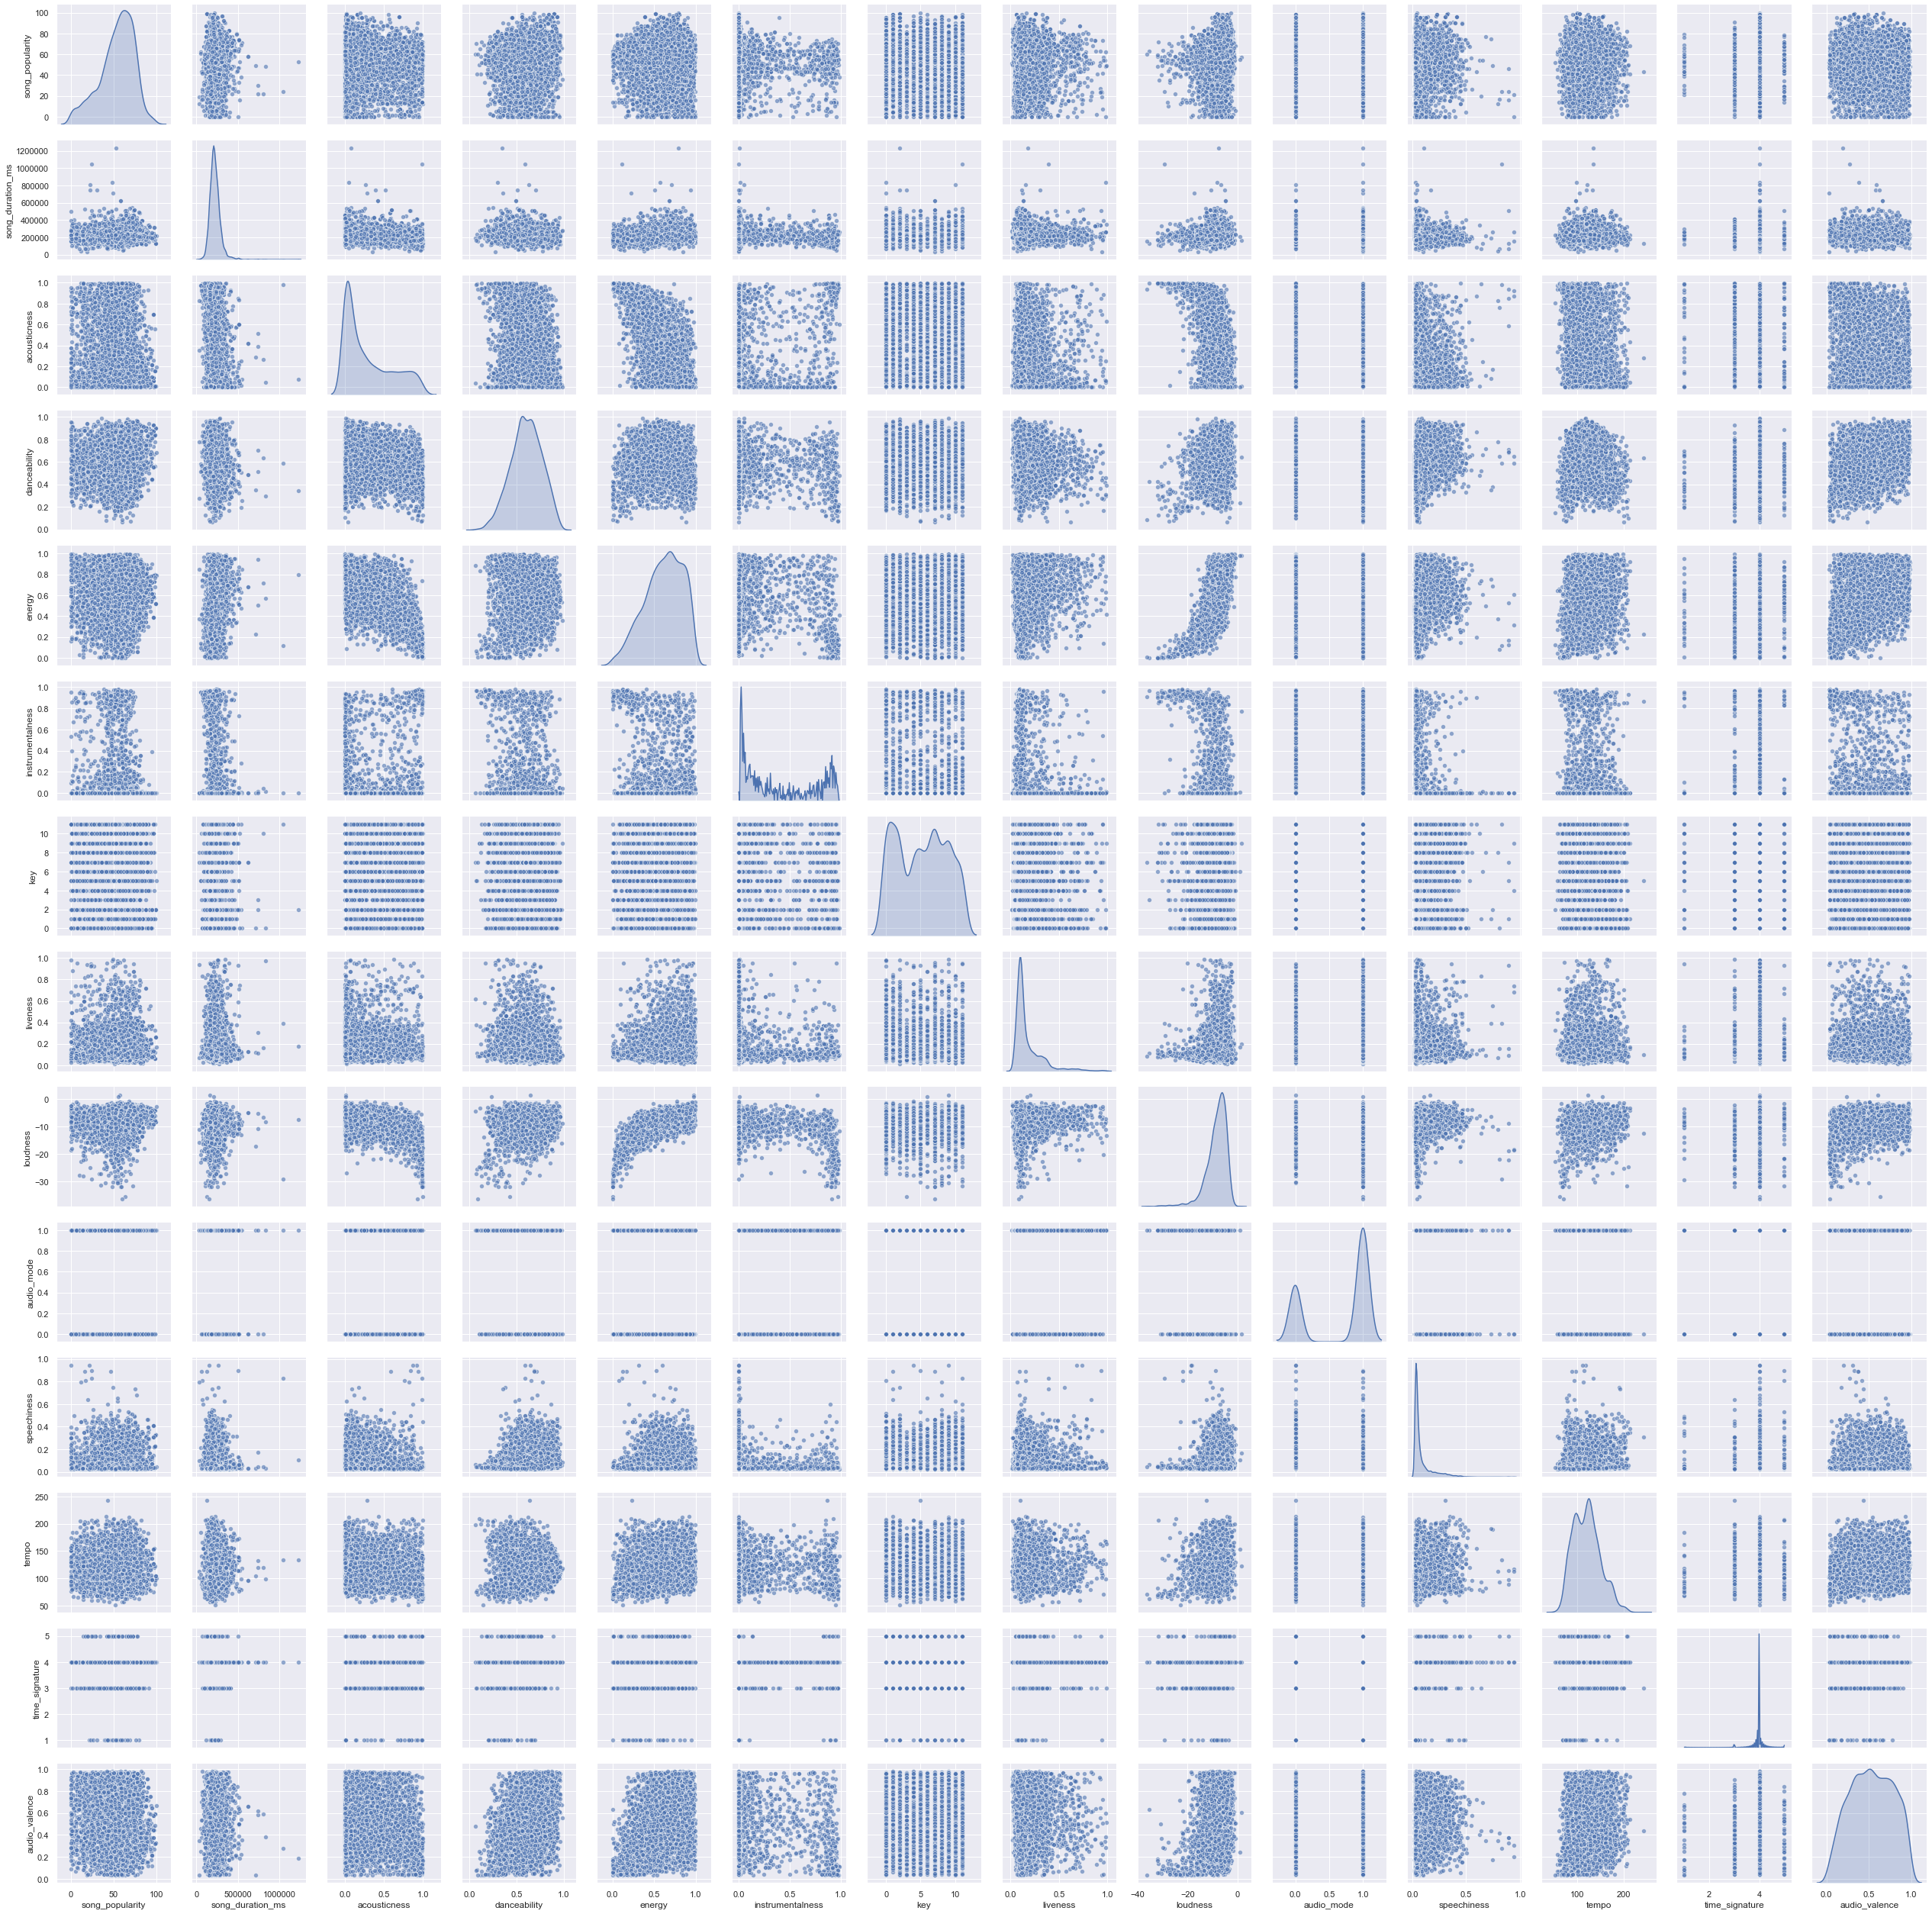

In [22]:
sns.pairplot(df[df.columns[1:]], diag_kind='kde',plot_kws={'alpha':0.6})

### Use correlation matrix to check whether there exists correlation between variables. We can find that the linear correlation between "energy" and "loudness" is 0.76 ,the linear correlation between "energy" and "ascousticness" is -0.66 and the linear correlation between "asscousticness" and "loudness" is 0.56. There may have some relation bewteen these three features. But that's not important, our goal is try to find the factors affecting popularity.

In [10]:
corr = df[df.columns[1:]].corr(method='pearson')
corr

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.018899     -0.065181   
song_duration_ms        -0.018899          1.000000     -0.097882   
acousticness            -0.065181         -0.097882      1.000000   
danceability             0.104290         -0.104985     -0.182500   
energy                   0.001365          0.092688     -0.662639   
instrumentalness        -0.130907         -0.015188      0.173098   
key                     -0.013160         -0.004615     -0.002025   
liveness                -0.038937          0.016086     -0.082537   
loudness                 0.099442          0.016469     -0.557744   
audio_mode              -0.004969         -0.026328      0.064100   
speechiness              0.021479         -0.083447     -0.093574   
tempo                   -0.022672          0.012791     -0.136421   
time_signature           0.034983          0.000264     -0.157177   
audio_valence           -0.052895         -0.063421     -0.121670   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.104290  0.001365         -0.130907 -0.013160   
song_duration_ms     -0.104985  0.092688         -0.015188 -0.004615   
acousticness         -0.182500 -0.662639          0.173098 -0.002025   
danceability          1.000000  0.044373         -0.130483  0.007723   
energy                0.044373  1.000000         -0.205914  0.020416   
instrumentalness     -0.130483 -0.205914          1.000000 -0.009463   
key                   0.007723  0.020416         -0.009463  1.000000   
liveness             -0.090694  0.167143         -0.032887 -0.008193   
loudness              0.177639  0.755516         -0.390248  0.010452   
audio_mode           -0.106539 -0.051605         -0.014983 -0.169848   
speechiness           0.213728  0.062053         -0.081138  0.033639   
tempo                -0.121286  0.162448         -0.036934  0.003239   
time_signature        0.136391  0.146265         -0.069181 -0.008282   
audio_valence         0.332014  0.316742         -0.178570  0.025356   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity  -0.038937  0.099442   -0.004969     0.021479 -0.022672   
song_duration_ms  0.016086  0.016469   -0.026328    -0.083447  0.012791   
acousticness     -0.082537 -0.557744    0.064100    -0.093574 -0.136421   
danceability     -0.090694  0.177639   -0.106539     0.213728 -0.121286   
energy            0.167143  0.755516   -0.051605     0.062053  0.162448   
instrumentalness -0.032887 -0.390248   -0.014983    -0.081138 -0.036934   
key              -0.008193  0.010452   -0.169848     0.033639  0.003239   
liveness          1.000000  0.102450   -0.001035     0.090845  0.031876   
loudness          0.102450  1.000000   -0.058506     0.078164  0.129938   
audio_mode       -0.001035 -0.058506    1.000000    -0.111627  0.020448   
speechiness       0.090845  0.078164   -0.111627     1.000000  0.071685   
tempo             0.031876  0.129938    0.020448     0.071685  1.000000   
time_signature    0.013289  0.119241   -0.024042     0.057162  0.003978   
audio_valence     0.013789  0.199696   -0.004558     0.011046  0.037667   

                  time_signature  audio_valence  
song_popularity         0.034983      -0.052895  
song_duration_ms        0.000264      -0.063421  
acousticness           -0.157177      -0.121670  
danceability            0.136391       0.332014  
energy                  0.146265       0.316742  
instrumentalness       -0.069181      -0.178570  
key                    -0.008282       0.025356  
liveness                0.013289       0.013789  
loudness                0.119241       0.199696  
audio_mode             -0.024042      -0.004558  
speechiness             0.057162       0.011046  
tempo                   0.003978       0.037667  
time_signature          1.000000       0.094670  
audio_valence           0.094670       1.000000

(14.0, 0)

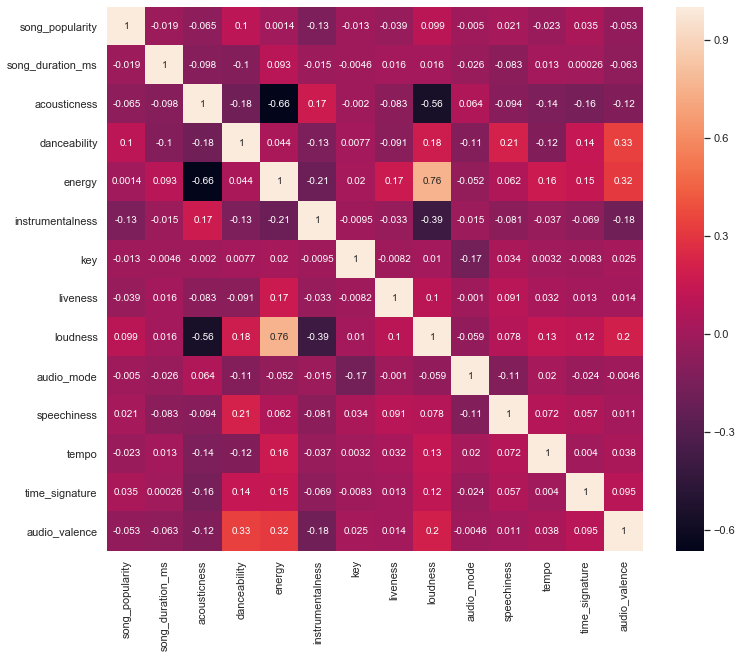

In [11]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True)
ax.set_ylim(14.0,0)


### We assume that the song popularity no less than 60 means it is a qualified song, which has more values. And we will use classifier tree to check the importance of these 13 factors to a qualified song.

In [12]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [13]:
song_df = df[df.columns[1:]]

In [14]:
song_df[song_df['song_popularity']>=60].count()

song_popularity     8021
song_duration_ms    8021
acousticness        8021
danceability        8021
energy              8021
instrumentalness    8021
key                 8021
liveness            8021
loudness            8021
audio_mode          8021
speechiness         8021
tempo               8021
time_signature      8021
audio_valence       8021
dtype: int64

### It is shown that only 8 thousand songs, about 42.5 percent of the whole dataset are qualified.

In [15]:
song_df['qualified'] = song_df.song_popularity>=60

In [48]:
clf = tree.DecisionTreeClassifier(min_samples_split = 10)
predictors = song_df.columns.tolist()
predictors.remove('song_popularity')
predictors.remove('qualified')
X = song_df[predictors].values
y = song_df.qualified.values.reshape(-1,1)

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33,random_state=0)
tree_est = clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)
CF = confusion_matrix(Y_test.T[0], Y_test_pred)
Accu_test=sum(np.diag(CF))/len(Y_test)
print('The accuracy on testing dataset is',Accu_test)

The accuracy on testing dataset is 0.6832368082368082


In [35]:
feature_importances = tree_est.feature_importances_
DF = pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)
print(DF) # This DF tells you which variable play a important role in improving your performance.


                  Importance
loudness            0.123313
acousticness        0.107819
instrumentalness    0.107811
song_duration_ms    0.098925
danceability        0.095222
speechiness         0.090315
audio_valence       0.087910
liveness            0.082547
tempo               0.082163
energy              0.077332
key                 0.036771
time_signature      0.007524
audio_mode          0.002348


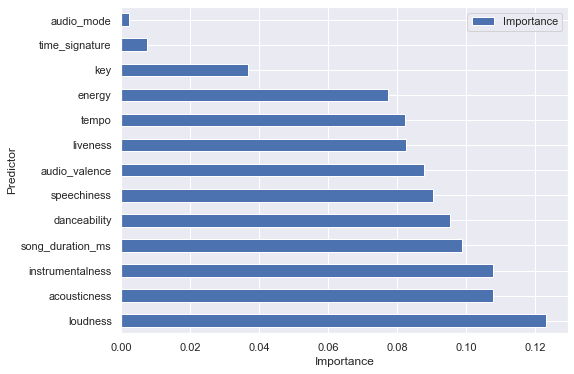

In [36]:
fig,ax1 = plt.subplots(1,1, figsize=(8,6))
DF.plot(kind='barh', ax=ax1);
ax1.set_xlabel('Importance');
ax1.set_ylabel('Predictor');
plt.show()

In [158]:
# 不要动这条
df = pd.read_csv("song_data.csv")
song_df = df[df.columns[1:]]
song_df['qualified'] = song_df.song_popularity>=60
clf = tree.DecisionTreeClassifier(min_samples_split = 15)
predictors = song_df.columns.tolist()
predictors.remove('song_popularity')
predictors.remove('qualified')
X = song_df[predictors].values
y = song_df.qualified.values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2)
tree_est = clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)
CF = confusion_matrix(Y_test.T[0], Y_test_pred)
Accu_test=sum(np.diag(CF))/len(Y_test)
print('The accuracy on testing dataset is',Accu_test)

The accuracy on testing dataset is 0.6902044066896735


In [159]:
feature_importances = tree_est.feature_importances_
DF = pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)
print(DF) # This DF tells you which variable play a important role in improving your performance.


                  Importance
audio_valence       0.112841
acousticness        0.109212
loudness            0.102342
instrumentalness    0.099522
energy              0.097131
speechiness         0.091836
danceability        0.085102
song_duration_ms    0.084242
tempo               0.080671
liveness            0.073918
key                 0.050226
audio_mode          0.007306
time_signature      0.005650


In [74]:
d = np.array([0.112841,0.109212,0.102342,0.099522,0.097131,0.091836,0.085102,0.084242,0.080671,0.073918,0.050226,0.007306,0.005650])
p = np.array(['audio_valence','acousticness','loudness','instrumentalness','energy',
              'speechiness','danceability','song_duration_ms','tempo','liveness',
              'key','audio_mode','time_signature' ])
DF2 = pd.DataFrame(d, index=p, columns=['importance'])


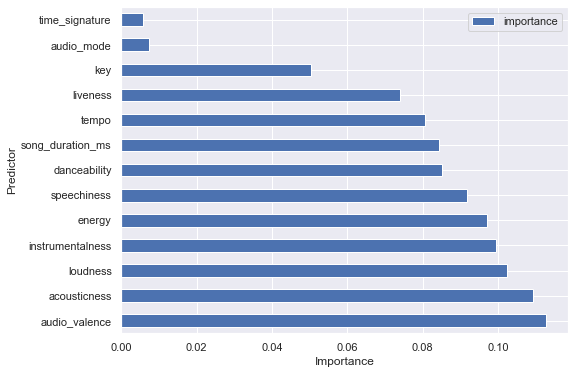

In [75]:
fig,ax1 = plt.subplots(1,1, figsize=(8,6))
DF2.plot(kind='barh', ax=ax1);
ax1.set_xlabel('Importance');
ax1.set_ylabel('Predictor');
plt.show()

### We split the whole data set into two parts, train set and test set, and the test data take 20 percent of the total dataset.  As the figure, we can easily find that audio valence is the most important factor with values of 0.113 and after that is acousticness and loudness, under the results with 0.690 accuracy.  And there is no obvious faults between adjacent factors. Instrumentalness, energy, speechiness and danceability are all above 0.085, among them the first three factors are above 0.09. 
### According to the description of the dataset. We find that audio valence describes the musical positiveness, and we assume that what a song convey can influence one to select the song. And loudness is the quality of a sound that is the primary psychological correlate of physical strength. So we try to give a conlusion that whether a song is qualified or not is related to psychological resonance.

### Then we build a classifier of dataset, and try to find something according to logit regression.

In [70]:
song_df.head()

song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
0          0.000029    8    0.0589    -4.095           1       0.0294   
1          0.000000    3    0.1080    -6.407           0       0.0498   
2          0.447000    0    0.2550    -7.828           1       0.0792   
3          0.003550    0    0.1020    -4.938           1       0.1070   
4          0.000000   10    0.1130    -5.065           1       0.0313   

     tempo  time_signature  audio_valence  qualified  
0  167.060               4          0.474       True  
1  105.256               4          0.370       True  
2  123.881               4          0.324       True  
3  122.444               4          0.198       True  
4  172.011               4          0.574      False

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import scale

In [97]:
qual = np.array([])
for i in song_df['song_popularity']:
    if i>=60:
        qual = np.append(qual, 1)
    else:
        qual = np.append(qual, 0)
song_df['qual'] = qual

In [117]:
# Construct the preditors to build a classifier:
predictors = np.array(['audio_valence','acousticness','loudness','instrumentalness','energy',
              'speechiness','danceability','song_duration_ms','tempo','liveness',
              'key','audio_mode','time_signature'])
X = sm.add_constant(song_df[predictors]) # Add constant to include the intercept
# Encode the response as 0,1 for Flase/True
y = song_df.qual.values.reshape(-1,1)
logit = sm.Logit(y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.657755
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                18835
Model:                          Logit   Df Residuals:                    18821
Method:                           MLE   Df Model:                           13
Date:                Thu, 19 Dec 2019   Pseudo R-squ.:                 0.03571
Time:                        20:44:27   Log-Likelihood:                -12389.
converged:                       True   LL-Null:                       -12848.
Covariance Type:            nonrobust   LLR p-value:                8.811e-188
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7998      0.280      2.856      0.004       0.251       1.349
audio_valen

### According to the above table, the specific form of the Logit model in this part can be obtained.

$ logit = 0.7998-0.5449\cdot audio\_valence-0.5377\cdot acousticness+0.0774\cdot loudness-1.4200\cdot instrumentalness-1.1318\cdot energy-0.4296\cdot speechiness+0.8764\cdot danceability-0.2886\cdot liveness-0.0100\cdot key$

### Since the values of song duration, tempo, audio mode and time signature are not significant (0.774,0.348,0.479,0.117), they are not included in the logit model.

### According to the odd list, we can know the change in the logarithm of odds for each unit change in the independent variable. For example, when the other variables remain in the same, for each 0.1 additional audio valence, the qualified probability of song will be 0.058 times.

### Loudness, danceability are positive correlated with the popularity while the rest are negative correlated with popularity. So we can try to draw a conclusion that the song with higher danceability and loudness, less energy and speechiness and instrumentalness, lower key and much more negative will be more popular than others and more easier to get 60 points in popularity score.

In [118]:
# odds ratios only
print(np.exp(results.params))

const               2.225036
audio_valence       0.579903
acousticness        0.584100
loudness            1.080521
instrumentalness    0.241707
energy              0.322443
speechiness         0.650771
danceability        2.402317
song_duration_ms    1.000000
tempo               0.999486
liveness            0.749317
key                 0.990075
audio_mode          1.022970
time_signature      1.089561
dtype: float64


### Next we test the model results, and find that there is 61.2 percent of correct predictions on the training set. The result is not good and not bad.

In [119]:
# Use the model to predict the failed and qualified
training_predictions = results.predict(X)
print(training_predictions)

0        0.518703
1        0.457405
2        0.428514
3        0.458043
4        0.442220
           ...   
18830    0.340470
18831    0.392432
18832    0.441697
18833    0.373136
18834    0.368282
Length: 18835, dtype: float64


In [121]:
# convert the probabilities to 'Qualified' or 'Failed' qualitative variables
qual_predictions = ['Qualified' if i > 0.5 else 'Failed' for i in training_predictions]
table = results.pred_table(threshold=0.5) # If the probability> threshold, it is up; otherwise it should be down
confusion_df = pd.DataFrame(table,['Failed','Qualified'],['Failed','Qualified'])
print(confusion_df)
print('The model made',
      (confusion_df.Failed[0]+confusion_df.Qualified[1])/confusion_df.sum().sum(), '% correct predictions on the TRAINING SET.')


           Failed  Qualified
Failed     8983.0     1831.0
Qualified  5486.0     2535.0
The model made 0.6115211043270508 % correct predictions on the TRAINING SET.


### Based on the previous experimental content, we use QDA(Quadratic discriminant analysis) for in-depth analysis. The test error of QDA is 0.469, it may can help to predict the probabilty of popularity score better.

In [215]:
#-----------QDA-----------
predictors = np.array(['audio_valence','acousticness','loudness','instrumentalness','energy',
              'speechiness','danceability','liveness','key'])
X = song_df[predictors].drop([0])
y = song_df['qual'].drop([0])
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.5)

In [216]:
clf_qda=QDA()
clf_qda.fit(X_train, Y_train)
Y_predict = clf_qda.predict(X_train)
Y_predict = np.array(Y_predict>0.5, dtype=float)

table = np.histogram2d(Y_predict, Y_test , bins=2)[0]
print(pd.DataFrame(table, ['Failed', 'Qualified'], ['Failed', 'Qualified']))
print('The test error of QDA is',sum(Y_predict==Y_test)/len(y_test))

           Failed  Qualified
Failed     1872.0     1545.0
Qualified  3459.0     2541.0
The test error of QDA is 0.4685708218305373


### Next we move on to explore the characterstic of popular songs which have score larger than 85. In the whole qualified song data set with 8021 records, 996 songs reach the popular standard.

In [187]:
qual_df = song_df[song_df['song_popularity']>=60]

In [195]:
popular = np.array([])
for i in qual_df['song_popularity']:
    if i>=85:
        popular = np.append(popular, 1)
    else:
        popular = np.append(popular, 0)
qual_df['popular'] = popular

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [205]:
qual_df = qual_df.drop(columns=['qualified','qual'])

In [203]:
qual_df[qual_df['popular'] == 1]

song_popularity  song_duration_ms  acousticness  danceability  energy  \
60                  94            210367        0.0143         0.818   0.540   
61                  98            212500        0.1530         0.841   0.798   
64                  94            180000        0.3460         0.638   0.717   
65                  87            179693        0.3520         0.746   0.703   
67                  85            223583        0.2350         0.701   0.512   
...                ...               ...           ...           ...     ...   
18499               91            142273        0.0350         0.964   0.346   
18503               91            205040        0.0609         0.850   0.569   
18697               85            164640        0.6600         0.769   0.479   
18702               86            163216        0.0476         0.752   0.764   
18734               89            201707        0.0956         0.708   0.648   

       instrumentalness  key  liveness  loudness  audio_mode  speechiness  \
60             0.000512    6    0.0990    -6.350           0       0.0544   
61             0.000003    1    0.0618    -4.206           0       0.2290   
64             0.000000    2    0.1050    -4.722           1       0.0337   
65             0.000000    4    0.3310    -4.179           0       0.1070   
67             0.000005    0    0.1350    -6.869           0       0.0969   
...                 ...  ...       ...       ...         ...          ...   
18499          0.000000    5    0.1080    -9.309           0       0.5300   
18503          0.081600    5    0.1000    -8.152           0       0.1360   
18697          0.000000    1    0.0914    -5.339           1       0.0385   
18702          0.000094    1    0.0543    -4.399           1       0.0380   
18734          0.000000    6    0.1340    -5.626           1       0.0449   

         tempo  time_signature  audio_valence  qualified  qual  popular  
60      97.064               4          0.174       True   1.0      1.0  
61      95.948               4          0.591       True   1.0      1.0  
64     100.027               4          0.249       True   1.0      1.0  
65     166.043               4          0.667       True   1.0      1.0  
67      91.947               4          0.663       True   1.0      1.0  
...        ...             ...            ...        ...   ...      ...  
18499  119.958               4          0.562       True   1.0      1.0  
18503   80.020               4          0.294       True   1.0      1.0  
18697   96.051               4          0.803       True   1.0      1.0  
18702  121.958               4          0.582       True   1.0      1.0  
18734  143.955               4          0.338       True   1.0      1.0  

[996 rows x 17 columns]

### And let's see the heat map. There seems not much difference between the orginal dataset. Then move on, we will do the same thing as above to build a classifier tree and see what will be different.

In [208]:
corr = qual_df[qual_df.columns[:-1]].corr(method='pearson')
corr

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.033671     -0.111932   
song_duration_ms        -0.033671          1.000000     -0.063211   
acousticness            -0.111932         -0.063211      1.000000   
danceability             0.196816         -0.148692     -0.206323   
energy                   0.032186          0.079128     -0.655419   
instrumentalness        -0.163025         -0.072120      0.228826   
key                     -0.015413          0.002344     -0.021046   
liveness                -0.024608          0.010501     -0.104046   
loudness                 0.177236          0.010769     -0.544406   
audio_mode              -0.045775         -0.009769      0.082649   
speechiness              0.107110         -0.072031     -0.125437   
tempo                   -0.002174          0.001859     -0.126072   
time_signature           0.039074          0.003970     -0.182070   
audio_valence           -0.065374         -0.061280     -0.178108   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.196816  0.032186         -0.163025 -0.015413   
song_duration_ms     -0.148692  0.079128         -0.072120  0.002344   
acousticness         -0.206323 -0.655419          0.228826 -0.021046   
danceability          1.000000  0.045287         -0.159414  0.010963   
energy                0.045287  1.000000         -0.223871  0.033020   
instrumentalness     -0.159414 -0.223871          1.000000 -0.010481   
key                   0.010963  0.033020         -0.010481  1.000000   
liveness             -0.047921  0.166734         -0.032026 -0.038046   
loudness              0.211127  0.733940         -0.444452  0.012091   
audio_mode           -0.123794 -0.073143          0.008937 -0.161694   
speechiness           0.238653  0.050947         -0.093165  0.055206   
tempo                -0.108679  0.128485         -0.045306  0.027303   
time_signature        0.119501  0.152297         -0.061905  0.004678   
audio_valence         0.301748  0.360402         -0.119421  0.017040   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity  -0.024608  0.177236   -0.045775     0.107110 -0.002174   
song_duration_ms  0.010501  0.010769   -0.009769    -0.072031  0.001859   
acousticness     -0.104046 -0.544406    0.082649    -0.125437 -0.126072   
danceability     -0.047921  0.211127   -0.123794     0.238653 -0.108679   
energy            0.166734  0.733940   -0.073143     0.050947  0.128485   
instrumentalness -0.032026 -0.444452    0.008937    -0.093165 -0.045306   
key              -0.038046  0.012091   -0.161694     0.055206  0.027303   
liveness          1.000000  0.112864   -0.001192     0.081795  0.027336   
loudness          0.112864  1.000000   -0.076346     0.092545  0.116242   
audio_mode       -0.001192 -0.076346    1.000000    -0.134937  0.003849   
speechiness       0.081795  0.092545   -0.134937     1.000000  0.131506   
tempo             0.027336  0.116242    0.003849     0.131506  1.000000   
time_signature    0.009863  0.128310   -0.033417     0.065468  0.004731   
audio_valence     0.026299  0.212633   -0.018722     0.017000  0.011274   

                  time_signature  audio_valence  
song_popularity         0.039074      -0.065374  
song_duration_ms        0.003970      -0.061280  
acousticness           -0.182070      -0.178108  
danceability            0.119501       0.301748  
energy                  0.152297       0.360402  
instrumentalness       -0.061905      -0.119421  
key                     0.004678       0.017040  
liveness                0.009863       0.026299  
loudness                0.128310       0.212633  
audio_mode             -0.033417      -0.018722  
speechiness             0.065468       0.017000  
tempo                   0.004731       0.011274  
time_signature          1.000000       0.087250  
audio_valence           0.087250       1.000000

(14.0, 0)

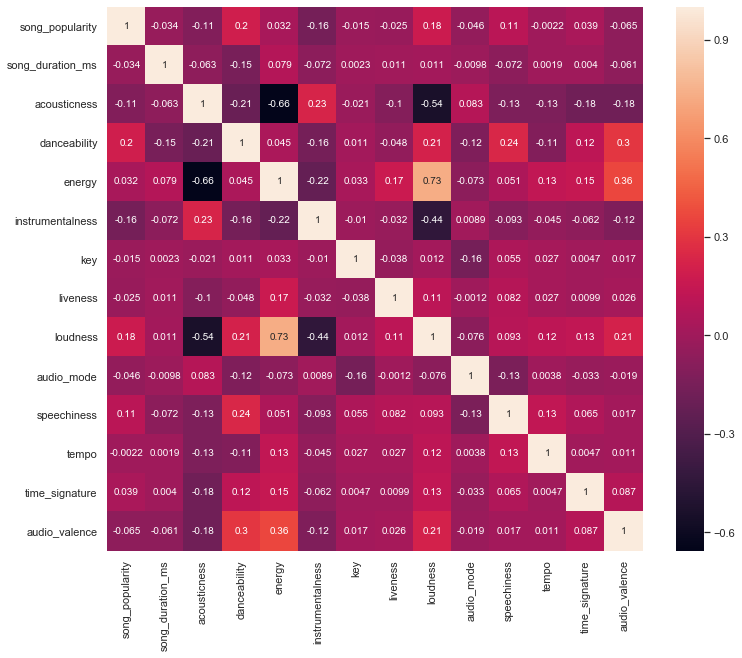

In [209]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True)
ax.set_ylim(14.0,0)

In [210]:
clf = tree.DecisionTreeClassifier(min_samples_split = 10)
predictors = qual_df.columns.tolist()
predictors.remove('song_popularity')
predictors.remove('popular')
X = qual_df[predictors].values
y = qual_df.popular.values.reshape(-1,1)

In [211]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33,random_state=0)
tree_est = clf.fit(X_train, Y_train)
Y_test_pred = clf.predict(X_test)
CF = confusion_matrix(Y_test.T[0], Y_test_pred)
Accu_test=sum(np.diag(CF))/len(Y_test)
print('The accuracy on testing dataset is',Accu_test)

The accuracy on testing dataset is 0.9527767283717415


In [212]:
feature_importances = tree_est.feature_importances_
DF = pd.DataFrame(data=feature_importances, index=predictors, columns = ['Importance']).sort_values(by=['Importance'], ascending=False)
print(DF) # This DF tells you which variable play a important role in improving your performance.


                  Importance
audio_valence       0.174084
tempo               0.146121
loudness            0.124776
danceability        0.103843
liveness            0.099317
song_duration_ms    0.087404
speechiness         0.076931
acousticness        0.068839
energy              0.051835
key                 0.040572
instrumentalness    0.025167
time_signature      0.001112
audio_mode          0.000000


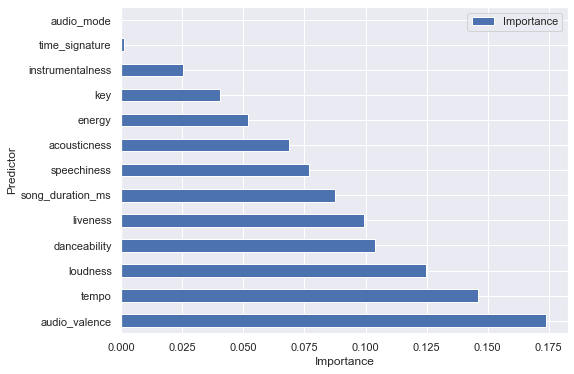

In [217]:
fig,ax1 = plt.subplots(1,1, figsize=(8,6))
DF.plot(kind='barh', ax=ax1);
ax1.set_xlabel('Importance');
ax1.set_ylabel('Predictor');
plt.show()

### Surprisingly, the accuracy on testing dataset which means the popular song may have some common traits. Audio valence still influence listener greatly with value of 0.174. The results of importance is really interest that the temp which is less important in original dataset, take place of acousticness and shows great importance in qualified song data set. Danceability and liveness are also more inportant, with values above 0.09. Some factors' importance decrease, especially instumentalness and energy seems no much important as in the original dataset.

### Also, we will find more details by using logit regression.

In [218]:
# Construct the preditors to build a classifier:
predictors = np.array(['audio_valence','acousticness','loudness','instrumentalness','energy',
              'speechiness','danceability','song_duration_ms','tempo','liveness',
              'key','audio_mode','time_signature'])
X = sm.add_constant(qual_df[predictors]) # Add constant to include the intercept
# Encode the response as 0,1 for Flase/True
y = qual_df.popular.values.reshape(-1,1)
logit = sm.Logit(y,X)
results = logit.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.329674
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8021
Model:                          Logit   Df Residuals:                     8007
Method:                           MLE   Df Model:                           13
Date:                Thu, 19 Dec 2019   Pseudo R-squ.:                  0.1212
Time:                        23:26:45   Log-Likelihood:                -2644.3
converged:                       True   LL-Null:                       -3009.2
Covariance Type:            nonrobust   LLR p-value:                1.546e-147
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5537      0.860      0.644      0.520      -1.132       2.240
audio_vale

D:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### According to the above table, the specific form of the Logit model in this part can be obtained.

$ logit = -1.9336\cdot audio\_valence+0.3282\cdot loudness-4.0101\cdot instrumentalness-2.4663\cdot energy-1.2271\cdot speechiness+3.4201\cdot danceability$

### Since the values of const,acousticness,tempo, liveness, key, audio mode and time signature are not significant (0.520,0.769,0.488,0.133,0.639,0.299,0.384), they are not included in the logit model. And the coefficient of song duration is too small, it is also not included in the logit model.

### According to the odd list, we can know the change in the logarithm of odds for each unit change in the independent variable.  When the other variables remain in the same, for each 0.1 additional danceability, the popular probability of song will be 3 times than before. So we can see it as an significant factors. 

### Comparing to the importance list, though instrumentalness shows less important than others, but it has a huge impact. When the other variables remain in the same, for each 0.1 additional instrumentalness, the popular probability of song will be 0.002 times than before. Looking at the description of instrumentaless, we may have a conclusion that a popular song is less likely to be pure music.

### Speechiness also shows greate influence which is less important. According to description, we find that no songs is high popularity score with the speechiness value larger than 0.66. So the premise of the popularity increase is the song should not be pure music.   

### Speechiness, danceability, loudness are positive correlated with the popularity while the rest are negative correlated with popularity. We also can try to draw a conclusion as above that the song , not the pure music, with higher danceability, speechiness and loudness, less energy and more negative will be much more popular than others and more easier to get 85 points in popularity.

In [233]:
qual_df[(qual_df["speechiness"]>0.66) & (qual_df["popular"]==1)]

Empty DataFrame
Columns: [song_popularity, song_duration_ms, acousticness, danceability, energy, instrumentalness, key, liveness, loudness, audio_mode, speechiness, tempo, time_signature, audio_valence, popular]
Index: []

In [219]:
print(np.exp(results.params))

const                1.739728
audio_valence        0.144619
acousticness         1.059642
loudness             1.388446
instrumentalness     0.018132
energy               0.084899
speechiness          3.411439
danceability        30.572194
song_duration_ms     0.999997
tempo                0.999055
liveness             0.653719
key                  0.995370
audio_mode           0.925680
time_signature       1.160830
dtype: float64


In [234]:
# Use the model to predict the failed and qualified
training_predictions = results.predict(X)
print(training_predictions)

0        0.104398
1        0.064718
2        0.033437
3        0.077557
5        0.063880
           ...   
18828    0.046584
18829    0.113293
18830    0.017132
18831    0.031946
18834    0.035042
Length: 8021, dtype: float64


In [235]:
# convert the probabilities to 'Qualified' or 'Failed' qualitative variables
qual_predictions = ['Popular' if i > 0.5 else 'Qualified' for i in training_predictions]
table = results.pred_table(threshold=0.5) # If the probability> threshold, it is up; otherwise it should be down
confusion_df = pd.DataFrame(table,['Qualified','Popular'],['Qualified','Popular'])
print(confusion_df)
print('The model made',
      (confusion_df.Qualified[0]+confusion_df.Popular[1])/confusion_df.sum().sum(), '% correct predictions on the TRAINING SET.')


           Qualified  Popular
Qualified     6975.0     50.0
Popular        996.0      0.0
The model made 0.8695923201595811 % correct predictions on the TRAINING SET.


### Next we test the model results to try to justify our guess and find that there is  percent of correct predictions on the training set. However, we should notice that there is no case predict the popularity score which is higher than 85 correct. So we can only judge the factors that affect the popularity score to less than 85 but can't have an accurate conclusion of what factors an popular song must have. This involves many factors, not just the song itself, but also the influence of the singer and the company's operations.

### Although the results are not particularly satisfactory, we still can do QDA to see whether it is a better model to predict. 

In [239]:
#-----------QDA-----------
predictors = np.array(['audio_valence','loudness','instrumentalness','energy',
              'speechiness','danceability'])
X = qual_df[predictors].drop([0])
y = qual_df['popular'].drop([0])
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.5)

In [240]:
clf_qda=QDA()
clf_qda.fit(X_train, Y_train)
Y_predict = clf_qda.predict(X_train)
Y_predict = np.array(Y_predict>0.5, dtype=float)

table = np.histogram2d(Y_predict, Y_test , bins=2)[0]
print(pd.DataFrame(table, ['Qualified','Popular'], ['Qualified','Popular']))
print('The test error of QDA is',sum(Y_predict==Y_test)/len(y_test))

           Qualified  Popular
Qualified     2229.0    299.0
Popular       1299.0    183.0
The test error of QDA is 0.2561053302187301


### The test error of QDA is 0.256. The result is much better that it can predict whether a song popular or not better than logit regression model. This QDA model can help to predict more accuracy.

### Exploratory Data Analysis

### Then we will focus on the popular song and try to find more infomation.

In [251]:
po_df = df[df['song_popularity']>=85]

In [255]:
po_df = po_df.reset_index(drop=True)

In [249]:
po_df.describe()

song_popularity  song_duration_ms  acousticness  danceability  \
count       996.000000        996.000000    996.000000    996.000000   
mean         90.902610     209396.163655      0.189880      0.717310   
std           4.085709      41582.443965      0.200771      0.128273   
min          85.000000     119133.000000      0.000282      0.351000   
25%          87.000000     187213.000000      0.037000      0.620000   
50%          91.000000     204664.000000      0.099000      0.740000   
75%          94.000000     225280.000000      0.288000      0.816000   
max         100.000000     417920.000000      0.940000      0.964000   

           energy  instrumentalness         key    liveness    loudness  \
count  996.000000        996.000000  996.000000  996.000000  996.000000   
mean     0.653358          0.004014    5.179719    0.167561   -5.689631   
std      0.139718          0.035469    3.704517    0.108479    1.886805   
min      0.264000          0.000000    0.000000    0.040600  -18.064000   
25%      0.563000          0.000000    1.000000    0.097775   -6.869000   
50%      0.669000          0.000000    5.000000    0.125000   -5.340000   
75%      0.768000          0.000005    8.000000    0.193500   -4.399000   
max      0.904000          0.391000   11.000000    0.716000   -1.358000   

       audio_mode  speechiness       tempo  time_signature  audio_valence  
count  996.000000   996.000000  996.000000      996.000000     996.000000  
mean     0.577309     0.128755  120.591436        3.991968       0.473593  
std      0.494235     0.111512   26.092222        0.141548       0.200788  
min      0.000000     0.024300   72.989000        3.000000       0.056400  
25%      0.000000     0.045700   97.565000        4.000000       0.329000  
50%      1.000000     0.071800  120.013000        4.000000       0.449000  
75%      1.000000     0.206000  143.010000        4.000000       0.603000  
max      1.000000     0.530000  203.911000        5.000000       0.931000

### Song name: collaboration or solo?
### The results show most of songs are not collabration.

In [386]:

feat = 0
for i in po_df['song_name']:
    if ('(feat' in i) or ('(with' in i):
        feat = feat + 1
feat

270

Text(0.5, 1.0, 'Is the song collabration or solo?')

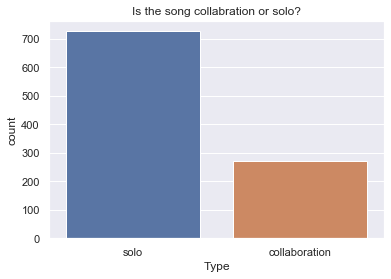

In [313]:
c_s = pd.DataFrame()
c_s['Type'] = np.array(['solo','collaboration'])
c_s['count'] = np.array([726,270])
sns.barplot(x='Type', y='count', data=c_s)
plt.title("Is the song collabration or solo?")

### Song name： word cloud
### The top 20 counts of words in song name is 'Love', 'No', 'Taki',' Like', 'Remix', 'Let', 'Better', 'FEFE', 'MIA', 'Up', 'Now', 'Stylist', 'Drip', 'Wake', 'Mo', 'Bamba', 'Electricity', 'Promises', 'Sky' and 'Alright'. 

In [326]:
song_name = np.array([])
for i in po_df['song_name']:
    sn = i.split('(')
    song_name = np.append(song_name, sn[0])
song_name

stop = ['-', 'The','A','a', 'In','It','I','Me','My','You','Be','in','the','IN']
song_word = np.array([])
for i in song_name:
    sw = i.split(' ')
    for j in sw:
        if len(j)>0:
            if j not in stop:
                song_word = np.append(song_word,j)
song_word

array(['MIA', 'Taki', 'Taki', ..., 'Body', 'Love', 'Lies'], dtype='<U32')

In [284]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import collections

In [327]:
word_counts = collections.Counter(song_word)
word_counts_top20 = word_counts.most_common(20)
print(word_counts_top20)

[('Love', 49), ('No', 39), ('Taki', 36), ('Like', 33), ('Remix', 24), ('Let', 22), ('Better', 22), ('FEFE', 19), ('MIA', 18), ('Up', 18), ('Now', 18), ('Stylist', 17), ('Drip', 17), ('Wake', 16), ('Mo', 16), ('Bamba', 16), ('Electricity', 16), ('Promises', 16), ('Sky', 14), ('Alright', 14)]


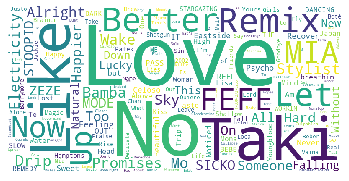

In [387]:


wordcloud = WordCloud(background_color="white",width=800, height=400, margin=2).generate_from_frequencies(word_counts)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [388]:
wordcloud.to_file('songname.png')

Text(0.5, 1.0, 'Distgram of Song Popularity above 85')

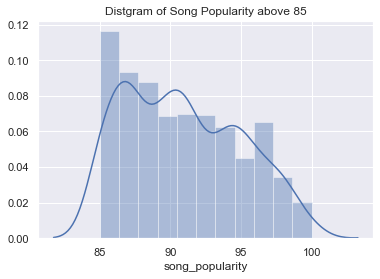

In [318]:
sns.distplot(po_df['song_popularity'])
plt.title('Distgram of Song Popularity above 85')

Text(0.5, 1.0, 'Distgram of Song Duration with Song popularity above 85')

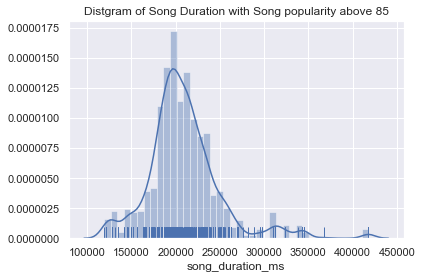

In [337]:
sns.distplot(po_df['song_duration_ms'], rug=True)
plt.title('Distgram of Song Duration with Song popularity above 85')

Text(0.5, 1.0, 'Distgram of Danceability with Song Popularity above 85')

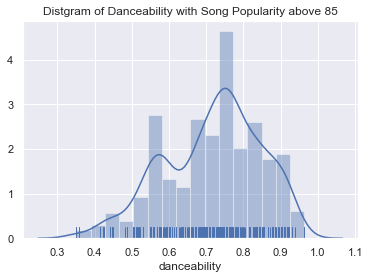

In [339]:
sns.distplot(po_df['danceability'], rug=True)
plt.title('Distgram of Danceability with Song Popularity above 85')

Text(0.5, 1.0, 'Distgram of Energy with Song Popularity above 85')

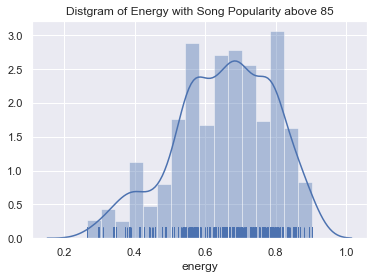

In [341]:
sns.distplot(po_df['energy'], rug=True)
plt.title('Distgram of Energy with Song Popularity above 85')

Text(0.5, 1.0, 'Distgram of Instrumentalness with Song Popularity above 85')

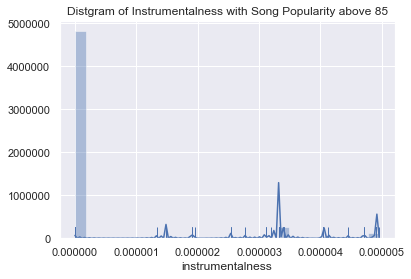

In [351]:
sns.distplot(po_df[po_df['instrumentalness']<0.000005]['instrumentalness'], rug=True)
plt.title('Distgram of Instrumentalness with Song Popularity above 85')

In [256]:
po_df

song_name  song_popularity  \
0                                 MIA (feat. Drake)               94   
1    Taki Taki (with Selena Gomez, Ozuna & Cardi B)               98   
2                  Beautiful (feat. Camila Cabello)               94   
3                                            Celoso               87   
4                                      Real Friends               85   
..                                              ...              ...   
991                                      Yes Indeed               91   
992                      Praise The Lord (Da Shine)               91   
993        Magic In The Hamptons (feat. Lil Yachty)               85   
994                                            Body               86   
995                        Love Lies (with Normani)               89   

     song_duration_ms  acousticness  danceability  energy  instrumentalness  \
0              210367        0.0143         0.818   0.540          0.000512   
1              212500        0.1530         0.841   0.798          0.000003   
2              180000        0.3460         0.638   0.717          0.000000   
3              179693        0.3520         0.746   0.703          0.000000   
4              223583        0.2350         0.701   0.512          0.000005   
..                ...           ...           ...     ...               ...   
991            142273        0.0350         0.964   0.346          0.000000   
992            205040        0.0609         0.850   0.569          0.081600   
993            164640        0.6600         0.769   0.479          0.000000   
994            163216        0.0476         0.752   0.764          0.000094   
995            201707        0.0956         0.708   0.648          0.000000   

     key  liveness  loudness  audio_mode  speechiness    tempo  \
0      6    0.0990    -6.350           0       0.0544   97.064   
1      1    0.0618    -4.206           0       0.2290   95.948   
2      2    0.1050    -4.722           1       0.0337  100.027   
3      4    0.3310    -4.179           0       0.1070  166.043   
4      0    0.1350    -6.869           0       0.0969   91.947   
..   ...       ...       ...         ...          ...      ...   
991    5    0.1080    -9.309           0       0.5300  119.958   
992    5    0.1000    -8.152           0       0.1360   80.020   
993    1    0.0914    -5.339           1       0.0385   96.051   
994    1    0.0543    -4.399           1       0.0380  121.958   
995    6    0.1340    -5.626           1       0.0449  143.955   

     time_signature  audio_valence  
0                 4          0.174  
1                 4          0.591  
2                 4          0.249  
3                 4          0.667  
4                 4          0.663  
..              ...            ...  
991               4          0.562  
992               4          0.294  
993               4          0.803  
994               4          0.582  
995               4          0.338  

[996 rows x 15 columns]

([<matplotlib.axis.XTick at 0x224ca3ff780>,
 <a list of 12 Text xticklabel objects>)

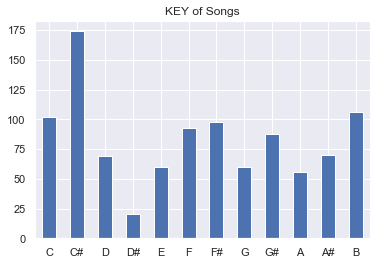

In [353]:
po_df["key"].value_counts().sort_index().plot(kind="bar")
plt.title("KEY of Songs")
plt.xticks(range(len(po_df["key"].value_counts().sort_index().index)),
           ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],
           rotation=0)

In [360]:
corr = po_df[po_df.columns[1:]].corr(method='pearson')
corr

song_popularity  song_duration_ms  acousticness  \
song_popularity          1.000000         -0.010437     -0.109047   
song_duration_ms        -0.010437          1.000000      0.056423   
acousticness            -0.109047          0.056423      1.000000   
danceability             0.129163         -0.046267     -0.300785   
energy                   0.062993          0.128834     -0.277868   
instrumentalness         0.086384          0.040911     -0.046329   
key                     -0.078126          0.059646      0.124278   
liveness                 0.014248         -0.156086     -0.240176   
loudness                -0.017069          0.129620     -0.122907   
audio_mode               0.089587         -0.010600      0.142666   
speechiness              0.170025         -0.036681     -0.191071   
tempo                   -0.132237          0.091067     -0.114086   
time_signature           0.090751          0.014932     -0.225245   
audio_valence           -0.158467          0.001690      0.005344   

                  danceability    energy  instrumentalness       key  \
song_popularity       0.129163  0.062993          0.086384 -0.078126   
song_duration_ms     -0.046267  0.128834          0.040911  0.059646   
acousticness         -0.300785 -0.277868         -0.046329  0.124278   
danceability          1.000000 -0.001906         -0.173428 -0.005092   
energy               -0.001906  1.000000         -0.056702 -0.060792   
instrumentalness     -0.173428 -0.056702          1.000000 -0.122563   
key                  -0.005092 -0.060792         -0.122563  1.000000   
liveness              0.207481  0.082618         -0.034658 -0.146856   
loudness              0.041644  0.715456         -0.241423  0.023975   
audio_mode           -0.157045 -0.068363         -0.115899 -0.134672   
speechiness           0.419882  0.019069         -0.030728 -0.032083   
tempo                 0.088013 -0.028812         -0.100008  0.115158   
time_signature        0.099661  0.091161          0.006426 -0.052827   
audio_valence         0.302985  0.327774         -0.168029 -0.026882   

                  liveness  loudness  audio_mode  speechiness     tempo  \
song_popularity   0.014248 -0.017069    0.089587     0.170025 -0.132237   
song_duration_ms -0.156086  0.129620   -0.010600    -0.036681  0.091067   
acousticness     -0.240176 -0.122907    0.142666    -0.191071 -0.114086   
danceability      0.207481  0.041644   -0.157045     0.419882  0.088013   
energy            0.082618  0.715456   -0.068363     0.019069 -0.028812   
instrumentalness -0.034658 -0.241423   -0.115899    -0.030728 -0.100008   
key              -0.146856  0.023975   -0.134672    -0.032083  0.115158   
liveness          1.000000  0.016746   -0.066036     0.099698  0.082637   
loudness          0.016746  1.000000   -0.019563    -0.103922  0.121961   
audio_mode       -0.066036 -0.019563    1.000000    -0.093977 -0.040102   
speechiness       0.099698 -0.103922   -0.093977     1.000000  0.121139   
tempo             0.082637  0.121961   -0.040102     0.121139  1.000000   
time_signature    0.006486  0.037059   -0.048579     0.161336  0.093114   
audio_valence     0.077256  0.334904   -0.031624     0.109516  0.059287   

                  time_signature  audio_valence  
song_popularity         0.090751      -0.158467  
song_duration_ms        0.014932       0.001690  
acousticness           -0.225245       0.005344  
danceability            0.099661       0.302985  
energy                  0.091161       0.327774  
instrumentalness        0.006426      -0.168029  
key                    -0.052827      -0.026882  
liveness                0.006486       0.077256  
loudness                0.037059       0.334904  
audio_mode             -0.048579      -0.031624  
speechiness             0.161336       0.109516  
tempo                   0.093114       0.059287  
time_signature          1.000000       0.085425  
audio_valence           0.085425       1.000000

(14.0, 0)

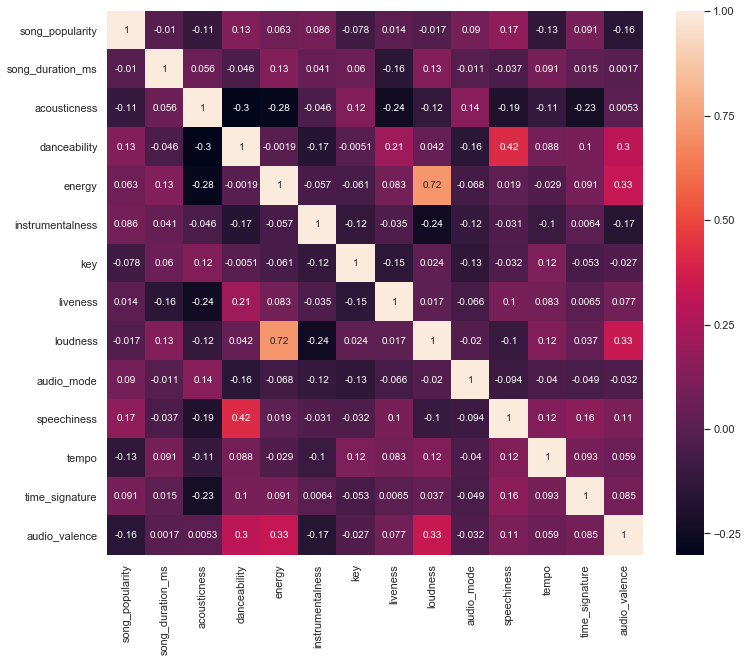

In [361]:
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr, annot=True)
ax.set_ylim(14.0,0)

Text(0.5, 1.0, 'Distgram of Loudness with Song Popularity above 85')

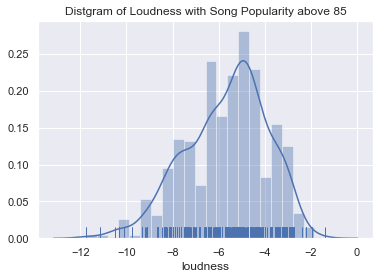

In [357]:
sns.distplot(po_df[po_df['loudness']>-12.5]['loudness'], rug=True)
plt.title('Distgram of Loudness with Song Popularity above 85')

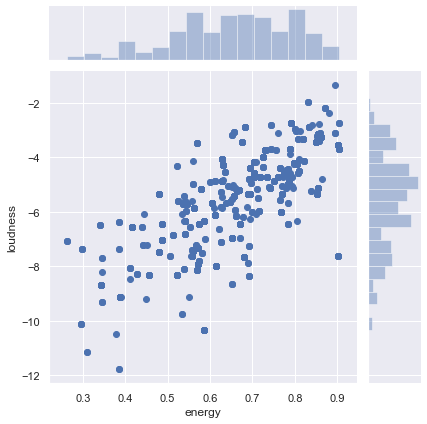

In [377]:
g = sns.jointplot(x="energy", y="loudness", data=po_df[po_df['loudness']>-12.5])

In [362]:
from sklearn import linear_model

Text(0, 0.5, 'loudness')

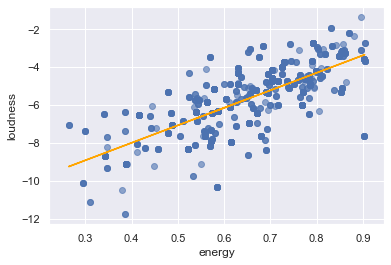

In [378]:
lin_model = linear_model.LinearRegression()
X = po_df[po_df['loudness']>-12.5]['energy'].values.reshape(-1,1)
Y = po_df[po_df['loudness']>-12.5]['loudness'].values.reshape(-1,1)
lin = lin_model.fit(X,Y)
pred_y=lin_model.predict(X)
plt.scatter(X,Y, alpha=0.6)
l2, = plt.plot(X,pred_y,color='orange')
plt.xlabel('energy')
plt.ylabel('loudness')

In [389]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(Y,X1).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1123.
Date:                Fri, 20 Dec 2019   Prob (F-statistic):          3.13e-165
Time:                        14:43:23   Log-Likelihood:                -1595.1
No. Observations:                 993   AIC:                             3194.
Df Residuals:                     991   BIC:                             3204.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6950      0.184    -63.443      0.0

### The linear relation between loudness and energy is 
$ loudness = 9.2368\cdot energy-11.6950 $

([<matplotlib.axis.XTick at 0x224ca7bdba8>,
 <a list of 2 Text xticklabel objects>)

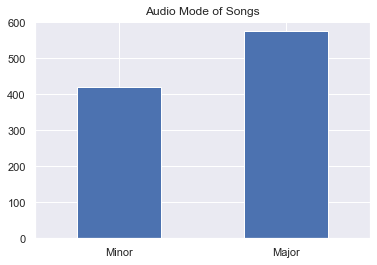

In [382]:
po_df["audio_mode"].value_counts().sort_index().plot(kind="bar")
plt.title("Audio Mode of Songs")
plt.xticks(range(len(po_df["audio_mode"].value_counts().sort_index().index)),
           ["Minor","Major"],
           rotation=0)

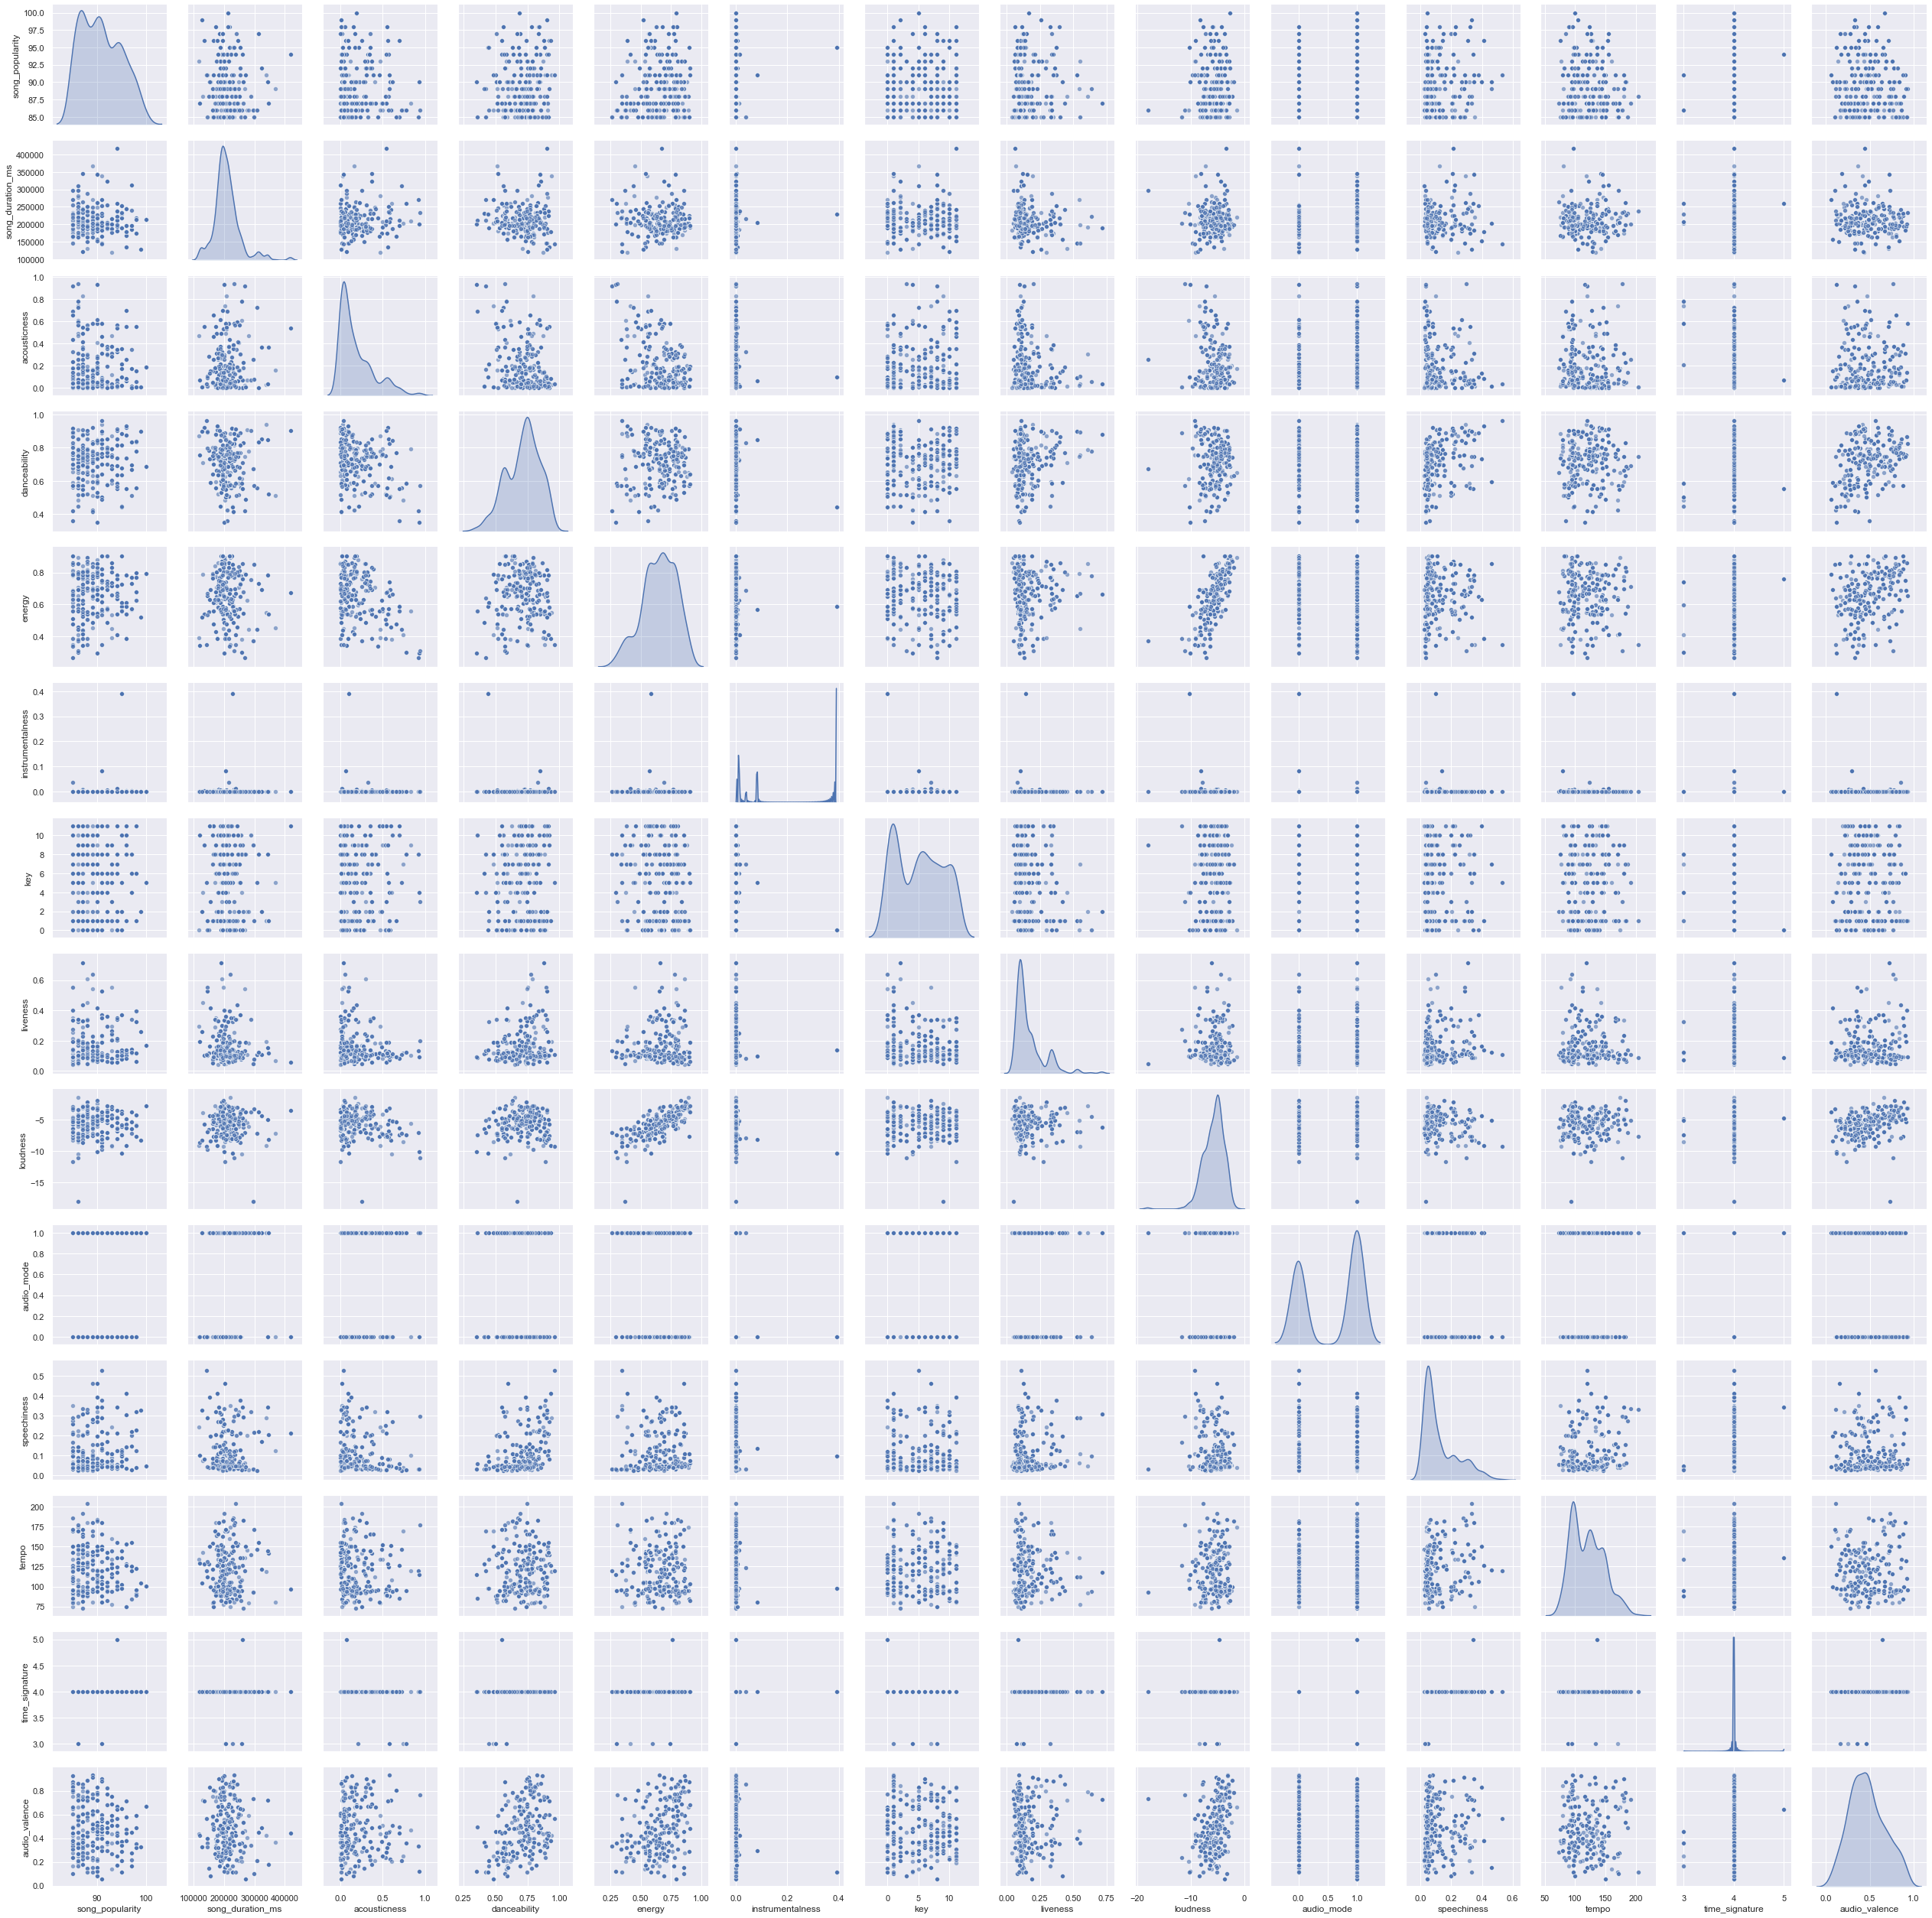

In [340]:
sns.pairplot(po_df[po_df.columns[1:]], diag_kind='kde',plot_kws={'alpha':0.6})